In [1]:
!pip install torch transformers datasets langchain-community langchain_nvidia_ai_endpoints==0.3.9 python-dotenv==1.1.0 torchrl llama-index bertviz wikipedia

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.8 MB/s eta 0:00:00
   

In [2]:
!pip install accelerate

In [3]:
!pip install -U datasets huggingface_hub fsspec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.3/489.3 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.31.2
    Uninstalling huggingface-hub-0.31.2:
      Successfully uninstalled huggingface-hub-0.31.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.

In [4]:
from datasets import load_dataset, DatasetDict,  concatenate_datasets
import torch
from transformers import BertTokenizer, DataCollatorForLanguageModeling, BertForSequenceClassification, default_data_collator
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
ciphers = ['Rot13', 'Atbash', 'Polybius', 'Vigenere', 'Reverse', 'SwapPairs', 'ParityShift', 'DualAvgCode', 'WordShift']

datasets = []
for cipher in ciphers:
    ds = load_dataset("yu0226/CipherBank", cipher, split="test")
    ds = ds.map(lambda x: {'cipher_type': cipher})
    datasets.append(ds)

dataset = concatenate_datasets(datasets)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/3.27k [00:00<?, ?B/s]

Rot13.jsonl:   0%|          | 0.00/96.8k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/262 [00:00<?, ? examples/s]

Map:   0%|          | 0/262 [00:00<?, ? examples/s]

Atbash.jsonl:   0%|          | 0.00/97.1k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/262 [00:00<?, ? examples/s]

Map:   0%|          | 0/262 [00:00<?, ? examples/s]

Polybius.jsonl:   0%|          | 0.00/156k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/262 [00:00<?, ? examples/s]

Map:   0%|          | 0/262 [00:00<?, ? examples/s]

Vigenere.jsonl:   0%|          | 0.00/97.6k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/262 [00:00<?, ? examples/s]

Map:   0%|          | 0/262 [00:00<?, ? examples/s]

Reverse.jsonl:   0%|          | 0.00/97.4k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/262 [00:00<?, ? examples/s]

Map:   0%|          | 0/262 [00:00<?, ? examples/s]

SwapPairs.jsonl:   0%|          | 0.00/97.9k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/262 [00:00<?, ? examples/s]

Map:   0%|          | 0/262 [00:00<?, ? examples/s]

ParityShift.jsonl:   0%|          | 0.00/98.4k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/262 [00:00<?, ? examples/s]

Map:   0%|          | 0/262 [00:00<?, ? examples/s]

DualAvgCode.jsonl:   0%|          | 0.00/122k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/262 [00:00<?, ? examples/s]

Map:   0%|          | 0/262 [00:00<?, ? examples/s]

WordShift.jsonl:   0%|          | 0.00/97.9k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/262 [00:00<?, ? examples/s]

Map:   0%|          | 0/262 [00:00<?, ? examples/s]

In [6]:
dataset = dataset.shuffle(seed=12)
split_dataset = dataset.train_test_split(test_size=0.2)

dataset = DatasetDict({
    "train": split_dataset["train"],
    "test": split_dataset["test"]
})

In [7]:
print(dataset.keys())
print("\n")
# print a sample from the dataset
print("Train sample: ", dataset["train"][:3])
print("\n")
print("Test sample: ", dataset["test"][:3])

dict_keys(['train', 'test'])


Train sample:  {'domain': ['Enterprise Sensitive Data', 'Personal Privacy Data', 'Internet Records'], 'sub_domain': ['Intellectual Property', 'Education Data', 'Cookie Data'], 'plaintext': ['Registrant contact: contact@vinnovations.com; Registration date: March 15, 2022.', 'Taylor was disciplined multiple times in middle school.', 'User-A12345 added a digital camera to their shopping cart on an e-commerce platform.'], 'Rot13': ['Ertvfgenag pbagnpg: pbagnpg@ivaabingvbaf.pbz; Ertvfgengvba qngr: Znepu 15, 2022.', None, 'Hfre-N12345 nqqrq n qvtvgny pnzren gb gurve fubccvat pneg ba na r-pbzzrepr cyngsbez.'], 'cipher_type': ['Rot13', 'WordShift', 'Rot13'], 'Atbash': [None, None, None], 'Polybius': [None, None, None], 'Vigenere': [None, None, None], 'Reverse': [None, None, None], 'SwapPairs': [None, None, None], 'ParityShift': [None, None, None], 'DualAvgCode': [None, None, None], 'WordShift': [None, 'lorTay was ciplineddis tiplemul estim ni dlemid ool.sch', Non

In [8]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

0

In [9]:
def massage_input_text(example):
    cipher_type = example["cipher_type"]
    ciphertext = example[cipher_type]

    input_text = f"Identify the cipher used in the ciphertext:\n{ciphertext}"

    return {"text": input_text}

def add_label(example):
    return {"labels": ciphers.index(example["cipher_type"])}

massaged_datasets = dataset.map(massage_input_text)
massaged_datasets = massaged_datasets.map(add_label)

Map:   0%|          | 0/1886 [00:00<?, ? examples/s]

Map:   0%|          | 0/472 [00:00<?, ? examples/s]

Map:   0%|          | 0/1886 [00:00<?, ? examples/s]

Map:   0%|          | 0/472 [00:00<?, ? examples/s]

In [10]:
massaged_datasets["train"][0]

{'domain': 'Enterprise Sensitive Data',
 'sub_domain': 'Intellectual Property',
 'plaintext': 'Registrant contact: contact@vinnovations.com; Registration date: March 15, 2022.',
 'Rot13': 'Ertvfgenag pbagnpg: pbagnpg@ivaabingvbaf.pbz; Ertvfgengvba qngr: Znepu 15, 2022.',
 'cipher_type': 'Rot13',
 'Atbash': None,
 'Polybius': None,
 'Vigenere': None,
 'Reverse': None,
 'SwapPairs': None,
 'ParityShift': None,
 'DualAvgCode': None,
 'WordShift': None,
 'text': 'Identify the cipher used in the ciphertext:\nErtvfgenag pbagnpg: pbagnpg@ivaabingvbaf.pbz; Ertvfgengvba qngr: Znepu 15, 2022.',
 'labels': 0}

In [11]:
def tokenize(tokenizer, example):
  tokenized = tokenizer(
      example["text"],
      max_length=64,
      padding="max_length",
      truncation=True,
      return_tensors="pt",
  )
  return tokenized

tokenized_dataset = massaged_datasets.map(
    lambda example: tokenize(tokenizer, example),
    batched=True,
    remove_columns= ["domain", "sub_domain", "plaintext", 'cipher_type', 'Rot13', 'Atbash', 'Polybius', 'Vigenere', 'Reverse', 'SwapPairs', 'ParityShift', 'DualAvgCode', 'WordShift']
)

Map:   0%|          | 0/1886 [00:00<?, ? examples/s]

Map:   0%|          | 0/472 [00:00<?, ? examples/s]

In [12]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Device: {device}")
else:
    device = torch.device("cpu")
    print(f"Device: {device}")

Device: cuda


In [13]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=9).to(device)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
train_dataset = tokenized_dataset["train"]
validation_dataset = tokenized_dataset["test"]

collate_fn = default_data_collator

dataloader = DataLoader(
    train_dataset,
    batch_size=16,
    shuffle=True,
    collate_fn=collate_fn,
)

validation_dataloader = DataLoader(
    validation_dataset,
    batch_size=16,
    shuffle=True,
    collate_fn=collate_fn
)

In [16]:
model.train()

model = model.to(device)

epochs = 5
train_steps = len(dataloader)
print("Number of training steps: ", train_steps)
num_test_steps = 150

optimizer = torch.optim.AdamW(model.parameters(), lr = 1e-4, weight_decay=0.01)
losses = []
validation_losses = []

dataloader_iter = iter(dataloader)

for e in range(epochs):
    for i in tqdm(range(train_steps)):
        try:
            x = next(dataloader_iter)
        except StopIteration:
            dataloader_iter = iter(dataloader)
            x = next(dataloader_iter)

        x = {k: v.to(device) for k, v in x.items()}

        outputs = model(**x)
        loss = outputs.loss
        loss.backward()
        losses.append(loss.item())
        optimizer.step()
        optimizer.zero_grad()

        if i % 10 == 0:
            print(f"Epoch {e}, step {i}, loss {loss.item()}")
            val_loss = 0
            for j in range(num_test_steps):
                x_test = next(iter(validation_dataloader))
                x_test = {k: v.to(device) for k, v in x_test.items()}
                with torch.no_grad():
                    test_outputs = model(**x_test)
                val_loss += test_outputs.loss.item()
            validation_losses.append(val_loss / num_test_steps)
            print("Test loss: ", val_loss / num_test_steps)

Number of training steps:  118


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch 0, step 0, loss 1.02875554561615


  2%|▏         | 2/118 [00:08<06:36,  3.42s/it]

Test loss:  1.5171316409111022


  8%|▊         | 10/118 [00:09<00:29,  3.62it/s]

Epoch 0, step 10, loss 0.5054796934127808


 10%|█         | 12/118 [00:17<03:19,  1.88s/it]

Test loss:  0.5642515206336975


 17%|█▋        | 20/118 [00:19<00:27,  3.62it/s]

Epoch 0, step 20, loss 0.2797812223434448


 19%|█▊        | 22/118 [00:27<03:00,  1.88s/it]

Test loss:  0.4823176274696986


 25%|██▌       | 30/118 [00:28<00:24,  3.58it/s]

Epoch 0, step 30, loss 0.3013046681880951


 27%|██▋       | 32/118 [00:37<02:44,  1.92s/it]

Test loss:  0.28933533971508346


 34%|███▍      | 40/118 [00:38<00:22,  3.52it/s]

Epoch 0, step 40, loss 0.6938347816467285


 36%|███▌      | 42/118 [00:47<02:27,  1.94s/it]

Test loss:  0.2874089916050434


 42%|████▏     | 50/118 [00:48<00:19,  3.40it/s]

Epoch 0, step 50, loss 0.16472424566745758


 44%|████▍     | 52/118 [00:57<02:11,  2.00s/it]

Test loss:  0.21751904271543027


 51%|█████     | 60/118 [00:59<00:16,  3.43it/s]

Epoch 0, step 60, loss 0.2108352780342102


 53%|█████▎    | 62/118 [01:07<01:51,  1.99s/it]

Test loss:  0.6423258329431216


 59%|█████▉    | 70/118 [01:09<00:14,  3.42it/s]

Epoch 0, step 70, loss 0.2899082601070404


 61%|██████    | 72/118 [01:18<01:32,  2.02s/it]

Test loss:  0.18967646420001982


 68%|██████▊   | 80/118 [01:19<00:11,  3.41it/s]

Epoch 0, step 80, loss 0.17214365303516388


 69%|██████▉   | 82/118 [01:28<01:10,  1.96s/it]

Test loss:  0.09325913413117329


 76%|███████▋  | 90/118 [01:29<00:08,  3.46it/s]

Epoch 0, step 90, loss 0.020438160747289658


 78%|███████▊  | 92/118 [01:38<00:50,  1.95s/it]

Test loss:  0.12819738165785868


 85%|████████▍ | 100/118 [01:39<00:05,  3.49it/s]

Epoch 0, step 100, loss 0.2784513235092163


 86%|████████▋ | 102/118 [01:48<00:31,  1.94s/it]

Test loss:  0.30744756208732726


 93%|█████████▎| 110/118 [01:49<00:02,  3.50it/s]

Epoch 0, step 110, loss 0.36366185545921326


 95%|█████████▍| 112/118 [01:58<00:11,  1.93s/it]

Test loss:  0.22101834930479528


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch 1, step 0, loss 0.053251173347234726


  2%|▏         | 2/118 [00:08<06:47,  3.51s/it]

Test loss:  0.1387110208099087


  8%|▊         | 10/118 [00:09<00:30,  3.49it/s]

Epoch 1, step 10, loss 0.03815010190010071


 10%|█         | 12/118 [00:18<03:28,  1.97s/it]

Test loss:  0.32935079305122295


 17%|█▋        | 20/118 [00:19<00:28,  3.48it/s]

Epoch 1, step 20, loss 0.02369755692780018


 19%|█▊        | 22/118 [00:28<03:07,  1.95s/it]

Test loss:  0.16091932385539015


 25%|██▌       | 30/118 [00:29<00:25,  3.47it/s]

Epoch 1, step 30, loss 0.020301131531596184


 27%|██▋       | 32/118 [00:38<02:48,  1.95s/it]

Test loss:  0.21643060011789203


 34%|███▍      | 40/118 [00:40<00:22,  3.47it/s]

Epoch 1, step 40, loss 0.2540767788887024


 36%|███▌      | 42/118 [00:48<02:28,  1.95s/it]

Test loss:  0.12156146308407187


 42%|████▏     | 50/118 [00:50<00:19,  3.46it/s]

Epoch 1, step 50, loss 0.27104032039642334


 44%|████▍     | 52/118 [00:58<02:08,  1.95s/it]

Test loss:  0.1554394640835623


 51%|█████     | 60/118 [01:00<00:16,  3.47it/s]

Epoch 1, step 60, loss 0.0326993353664875


 53%|█████▎    | 62/118 [01:08<01:48,  1.94s/it]

Test loss:  0.15585686979504923


 59%|█████▉    | 70/118 [01:10<00:13,  3.47it/s]

Epoch 1, step 70, loss 0.11764377355575562


 61%|██████    | 72/118 [01:18<01:29,  1.95s/it]

Test loss:  0.2253803717531264


 68%|██████▊   | 80/118 [01:20<00:10,  3.48it/s]

Epoch 1, step 80, loss 0.04025190696120262


 69%|██████▉   | 82/118 [01:28<01:10,  1.95s/it]

Test loss:  0.1625009732072552


 76%|███████▋  | 90/118 [01:30<00:08,  3.47it/s]

Epoch 1, step 90, loss 0.4511391520500183


 78%|███████▊  | 92/118 [01:38<00:50,  1.95s/it]

Test loss:  0.18016725896236796


 85%|████████▍ | 100/118 [01:40<00:05,  3.48it/s]

Epoch 1, step 100, loss 0.10958714783191681


 86%|████████▋ | 102/118 [01:48<00:31,  1.95s/it]

Test loss:  0.12765841937934358


 93%|█████████▎| 110/118 [01:50<00:02,  3.48it/s]

Epoch 1, step 110, loss 0.01568695716559887


 95%|█████████▍| 112/118 [01:58<00:11,  1.94s/it]

Test loss:  0.0904853235433499


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch 2, step 0, loss 0.00972694531083107


  2%|▏         | 2/118 [00:08<06:49,  3.53s/it]

Test loss:  0.0640515878610313


  8%|▊         | 10/118 [00:09<00:31,  3.47it/s]

Epoch 2, step 10, loss 0.12291224300861359


 10%|█         | 12/118 [00:18<03:29,  1.97s/it]

Test loss:  0.08580637667017678


 17%|█▋        | 20/118 [00:20<00:28,  3.47it/s]

Epoch 2, step 20, loss 0.31899333000183105


 19%|█▊        | 22/118 [00:28<03:07,  1.95s/it]

Test loss:  0.0622889170019577


 25%|██▌       | 30/118 [00:30<00:25,  3.47it/s]

Epoch 2, step 30, loss 0.011115490458905697


 27%|██▋       | 32/118 [00:38<02:47,  1.95s/it]

Test loss:  0.07347067355178297


 34%|███▍      | 40/118 [00:40<00:22,  3.47it/s]

Epoch 2, step 40, loss 0.007801428437232971


 36%|███▌      | 42/118 [00:48<02:28,  1.95s/it]

Test loss:  0.062199161797761915


 42%|████▏     | 50/118 [00:50<00:19,  3.48it/s]

Epoch 2, step 50, loss 0.009979735128581524


 44%|████▍     | 52/118 [00:58<02:08,  1.94s/it]

Test loss:  0.09267169564341506


 51%|█████     | 60/118 [01:00<00:16,  3.48it/s]

Epoch 2, step 60, loss 0.008609875105321407


 53%|█████▎    | 62/118 [01:08<01:48,  1.94s/it]

Test loss:  0.10126740793697536


 59%|█████▉    | 70/118 [01:10<00:13,  3.48it/s]

Epoch 2, step 70, loss 0.021156394854187965


 61%|██████    | 72/118 [01:18<01:29,  1.95s/it]

Test loss:  0.07894485369945566


 68%|██████▊   | 80/118 [01:20<00:10,  3.48it/s]

Epoch 2, step 80, loss 0.005980233661830425


 69%|██████▉   | 82/118 [01:28<01:10,  1.95s/it]

Test loss:  0.11007551420480013


 76%|███████▋  | 90/118 [01:30<00:08,  3.48it/s]

Epoch 2, step 90, loss 0.033780209720134735


 78%|███████▊  | 92/118 [01:38<00:50,  1.95s/it]

Test loss:  0.07899592684892316


 85%|████████▍ | 100/118 [01:40<00:05,  3.48it/s]

Epoch 2, step 100, loss 0.18789970874786377


 86%|████████▋ | 102/118 [01:48<00:31,  1.95s/it]

Test loss:  0.0751929460077857


 93%|█████████▎| 110/118 [01:50<00:02,  3.48it/s]

Epoch 2, step 110, loss 0.03336331248283386


 95%|█████████▍| 112/118 [01:58<00:11,  1.94s/it]

Test loss:  0.10069201405160129


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch 3, step 0, loss 0.005488250404596329


  2%|▏         | 2/118 [00:08<06:49,  3.53s/it]

Test loss:  0.07064057996807


  8%|▊         | 10/118 [00:09<00:31,  3.48it/s]

Epoch 3, step 10, loss 0.01263914443552494


 10%|█         | 12/118 [00:18<03:29,  1.98s/it]

Test loss:  0.10850910121109336


 17%|█▋        | 20/118 [00:20<00:28,  3.47it/s]

Epoch 3, step 20, loss 0.0038340429309755564


 19%|█▊        | 22/118 [00:28<03:07,  1.95s/it]

Test loss:  0.09001390629758438


 25%|██▌       | 30/118 [00:30<00:25,  3.48it/s]

Epoch 3, step 30, loss 0.19726867973804474


 27%|██▋       | 32/118 [00:38<02:47,  1.95s/it]

Test loss:  0.15400095395743846


 34%|███▍      | 40/118 [00:40<00:22,  3.48it/s]

Epoch 3, step 40, loss 0.006086140871047974


 36%|███▌      | 42/118 [00:48<02:27,  1.95s/it]

Test loss:  0.06022262012275557


 42%|████▏     | 50/118 [00:50<00:19,  3.47it/s]

Epoch 3, step 50, loss 0.025785163044929504


 44%|████▍     | 52/118 [00:58<02:07,  1.94s/it]

Test loss:  0.0728985020518303


 51%|█████     | 60/118 [01:00<00:16,  3.47it/s]

Epoch 3, step 60, loss 0.005544180516153574


 53%|█████▎    | 62/118 [01:08<01:48,  1.94s/it]

Test loss:  0.10958792839199305


 59%|█████▉    | 70/118 [01:10<00:13,  3.49it/s]

Epoch 3, step 70, loss 0.10470239073038101


 61%|██████    | 72/118 [01:18<01:29,  1.95s/it]

Test loss:  0.12915620364869634


 68%|██████▊   | 80/118 [01:20<00:10,  3.48it/s]

Epoch 3, step 80, loss 0.039619870483875275


 69%|██████▉   | 82/118 [01:28<01:10,  1.95s/it]

Test loss:  0.11675007838678236


 76%|███████▋  | 90/118 [01:30<00:08,  3.49it/s]

Epoch 3, step 90, loss 0.003199309576302767


 78%|███████▊  | 92/118 [01:38<00:50,  1.95s/it]

Test loss:  0.07252355804822097


 85%|████████▍ | 100/118 [01:40<00:05,  3.49it/s]

Epoch 3, step 100, loss 0.0031648026779294014


 86%|████████▋ | 102/118 [01:48<00:31,  1.94s/it]

Test loss:  0.09212201431316012


 93%|█████████▎| 110/118 [01:50<00:02,  3.47it/s]

Epoch 3, step 110, loss 0.004312016535550356


 95%|█████████▍| 112/118 [01:58<00:11,  1.94s/it]

Test loss:  0.09584555642989774


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch 4, step 0, loss 0.0028166102711111307


  2%|▏         | 2/118 [00:08<06:49,  3.53s/it]

Test loss:  0.08939798855377983


  8%|▊         | 10/118 [00:09<00:30,  3.48it/s]

Epoch 4, step 10, loss 0.0020707356743514538


 10%|█         | 12/118 [00:18<03:28,  1.97s/it]

Test loss:  0.08771491682622581


 17%|█▋        | 20/118 [00:20<00:28,  3.48it/s]

Epoch 4, step 20, loss 0.0022167267743498087


 19%|█▊        | 22/118 [00:28<03:06,  1.95s/it]

Test loss:  0.07666584775860731


 25%|██▌       | 30/118 [00:30<00:25,  3.48it/s]

Epoch 4, step 30, loss 0.004319596104323864


 27%|██▋       | 32/118 [00:38<02:47,  1.94s/it]

Test loss:  0.2050598090987963


 34%|███▍      | 40/118 [00:40<00:22,  3.49it/s]

Epoch 4, step 40, loss 0.008821514435112476


 36%|███▌      | 42/118 [00:48<02:27,  1.95s/it]

Test loss:  0.4523662200042357


 42%|████▏     | 50/118 [00:50<00:19,  3.48it/s]

Epoch 4, step 50, loss 0.0035570852924138308


 44%|████▍     | 52/118 [00:58<02:07,  1.94s/it]

Test loss:  0.12200521408813074


 51%|█████     | 60/118 [01:00<00:16,  3.48it/s]

Epoch 4, step 60, loss 0.0015034585958346725


 53%|█████▎    | 62/118 [01:08<01:48,  1.94s/it]

Test loss:  0.09218439822085202


 59%|█████▉    | 70/118 [01:09<00:13,  3.49it/s]

Epoch 4, step 70, loss 0.038556430488824844


 61%|██████    | 72/118 [01:18<01:29,  1.95s/it]

Test loss:  0.07284941983642057


 68%|██████▊   | 80/118 [01:20<00:10,  3.48it/s]

Epoch 4, step 80, loss 0.003355808090418577


 69%|██████▉   | 82/118 [01:28<01:10,  1.95s/it]

Test loss:  0.08902172634843737


 76%|███████▋  | 90/118 [01:30<00:08,  3.47it/s]

Epoch 4, step 90, loss 0.003836626186966896


 78%|███████▊  | 92/118 [01:38<00:50,  1.95s/it]

Test loss:  0.07591736062429845


 85%|████████▍ | 100/118 [01:40<00:05,  3.48it/s]

Epoch 4, step 100, loss 0.005954062100499868


 86%|████████▋ | 102/118 [01:48<00:31,  1.95s/it]

Test loss:  0.11280273156939075


 93%|█████████▎| 110/118 [01:50<00:02,  3.47it/s]

Epoch 4, step 110, loss 0.001961145782843232


 95%|█████████▍| 112/118 [01:58<00:11,  1.94s/it]

Test loss:  0.058531860921066256


100%|██████████| 118/118 [01:59<00:00,  1.01s/it]


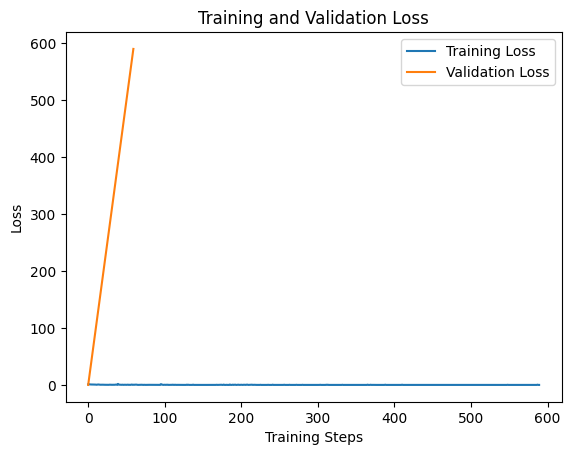

In [17]:
plt.plot(losses, label="Training Loss")
plt.plot(
    [i * 10 for i in range(len(validation_losses))],
    label="Validation Loss"
)
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()


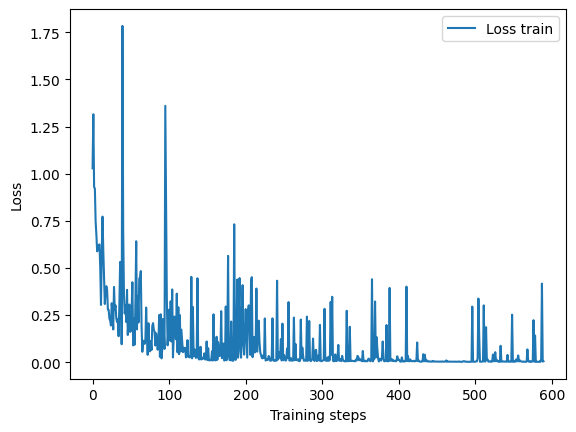

In [18]:
plt.plot( losses, label="Loss train")
plt.xlabel("Training steps")
plt.ylabel("Loss")
plt.legend()
plt.show()


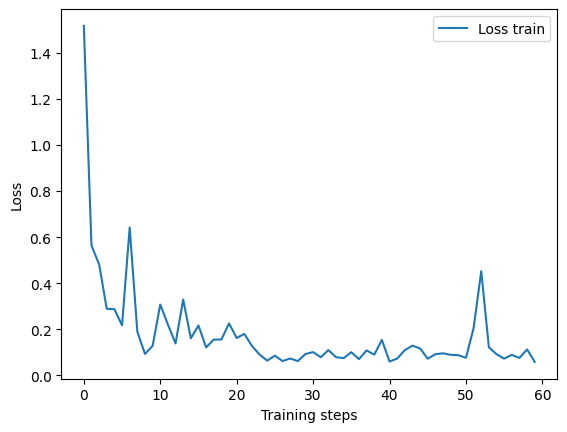

In [19]:
plt.plot( validation_losses, label="Loss train")
plt.xlabel("Training steps")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [20]:
def construct_test_samples(example):
    cipher_type = example["cipher_type"]
    ciphertext = example[cipher_type]

    input_text = f"Identify the cipher used in the ciphertext:\n{ciphertext}"

    return {"text": input_text, "label": cipher_type}

test_samples = [construct_test_samples(dataset["test"][i]) for i in range(10)]
test_samples

[{'text': 'Identify the cipher used in the ciphertext:\nNvwrxzo Ivxliw Mfnyvi: NI123456; Kzgrvmg RW: KRW987654; Zoovitb: Hsvoourhs, yvv hgrmth, ozgvc; ivzxgrlmh: zmzksbozcrh.',
  'label': 'Atbash'},
 {'text': 'Identify the cipher used in the ciphertext:\nQzudou HE: TR10203456C, Qzudou nvods: UdbiOnwz Hoonwzuhnor, Ghmhof ezud: Ktmx 15, 2021.',
  'label': 'ParityShift'},
 {'text': 'Identify the cipher used in the ciphertext:\nXozip slowh gsv RW Xziw Mfnyvi 1931-9374-8919.',
  'label': 'Atbash'},
 {'text': 'Identify the cipher used in the ciphertext:\nry/Exit:Ent ryEnt ID: 67,345 tExi ID: 65,987 icle:Veh 23CD,AB1 e:Nam nJoh ,Doe ionality:Nat uland,Sim ry:Ent 3-08-15,202 t:Exi 3-08-20202',
  'label': 'WordShift'},
 {'text': 'Identify the cipher used in the ciphertext:\nard,How kedran h.11t',
  'label': 'WordShift'},
 {'text': 'Identify the cipher used in the ciphertext:\nVnkolbvv RW: 10023456, Vnkolbnvmg Hgzig: 2020-06-15, 4 bvzih rm Hlugdziv Wvevolknvmg',
  'label': 'Atbash'},
 {'text': '

In [36]:
label_map = {
    "LABEL_0": "Rot13",
    "LABEL_1": "Atbash",
    "LABEL_2": "Polybius",
    "LABEL_3": "Vigenere",
    "LABEL_4": "Reverse",
    "LABEL_5": "SwapPairs",
    "LABEL_6": "ParityShift",
    "LABEL_7": "DualAvgCode",
    "LABEL_8": "WordShift",
}

predictions = []
for sample in test_samples:
    input_text = sample["text"]
    inputs = tokenizer(input_text, return_tensors="pt").to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    predicted_class_id = logits.argmax(dim=-1).item()
    predicted_label = model.config.id2label[predicted_class_id]

    predictions.append((input_text, predicted_label, sample["label"]))

print("Predictions of trained model:")
for i, (input_text, predicted_token, true_label) in enumerate(predictions, 1):
    predicted_label = label_map.get(predicted_token, predicted_token)
    print(f"Example {i}:")
    print(f"Input:{input_text}")
    print(f"Predicted Label: {predicted_label}")
    print(f"True Label: {true_label}")

Predictions of trained model:
Example 1:
Input:Identify the cipher used in the ciphertext:
Nvwrxzo Ivxliw Mfnyvi: NI123456; Kzgrvmg RW: KRW987654; Zoovitb: Hsvoourhs, yvv hgrmth, ozgvc; ivzxgrlmh: zmzksbozcrh.
Predicted Label: Atbash
True Label: Atbash
Example 2:
Input:Identify the cipher used in the ciphertext:
Qzudou HE: TR10203456C, Qzudou nvods: UdbiOnwz Hoonwzuhnor, Ghmhof ezud: Ktmx 15, 2021.
Predicted Label: ParityShift
True Label: ParityShift
Example 3:
Input:Identify the cipher used in the ciphertext:
Xozip slowh gsv RW Xziw Mfnyvi 1931-9374-8919.
Predicted Label: Atbash
True Label: Atbash
Example 4:
Input:Identify the cipher used in the ciphertext:
ry/Exit:Ent ryEnt ID: 67,345 tExi ID: 65,987 icle:Veh 23CD,AB1 e:Nam nJoh ,Doe ionality:Nat uland,Sim ry:Ent 3-08-15,202 t:Exi 3-08-20202
Predicted Label: WordShift
True Label: WordShift
Example 5:
Input:Identify the cipher used in the ciphertext:
ard,How kedran h.11t
Predicted Label: SwapPairs
True Label: WordShift
Example 6:
Inpu